# MARKET BASKET ANALYSIS

## Importing the necessary libraries & loading the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [3]:
excel_file = 'C:\\Users\\ruhal.shaikh\\Desktop\\prod_affinities\\datasets\\Online Retail.xlsx'
transactions = pd.read_excel(excel_file)

In [4]:
transactions.shape

(541909, 8)

In [5]:
transactions.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [6]:
transactions['InvoiceNo'].isnull().any()

False

## Filtering Data

In [7]:
transactions['Description'] = transactions['Description'].str.strip()
transactions.dropna(axis=0, subset=['InvoiceNo'], inplace = True)
transactions['InvoiceNo'] = transactions['InvoiceNo'].astype('str')
transactions = transactions[~transactions['InvoiceNo'].str.contains('C')]

In [8]:
transactions.shape

(532621, 8)

## Data Manipulation

In [9]:
uk_sales = (transactions[transactions['Country'] == "United Kingdom"].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))

In [10]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
basket_sets = uk_sales.applymap(encode_units)
basket_sets.drop('POSTAGE',inplace=True, axis=1)

## Apriori Algorithm

In [46]:
frequent_sets = apriori(basket_sets, min_support =0.02, use_colnames = True)

In [47]:
rules = association_rules(frequent_sets, metric="lift",min_threshold=0.8)
rules = rules.sort_values(by='support',ascending=False)

## Top 10 Most Purchased Products in association rules

In [48]:
most_purchased = frequent_sets.sort_values(by='support',ascending=False)[0:10]

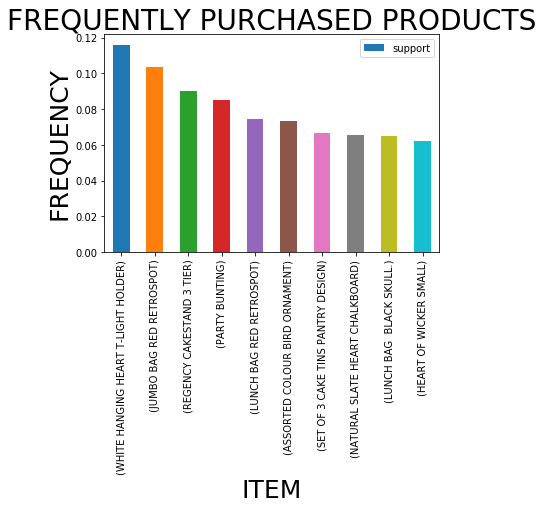

In [49]:
most_purchased.plot(kind='bar',x='itemsets',y='support')
plt.title('FREQUENTLY PURCHASED PRODUCTS',fontsize=28)
plt.xlabel('ITEM',fontsize=25)
plt.ylabel('FREQUENCY',fontsize=25)
plt.show()

## Visualization of rules

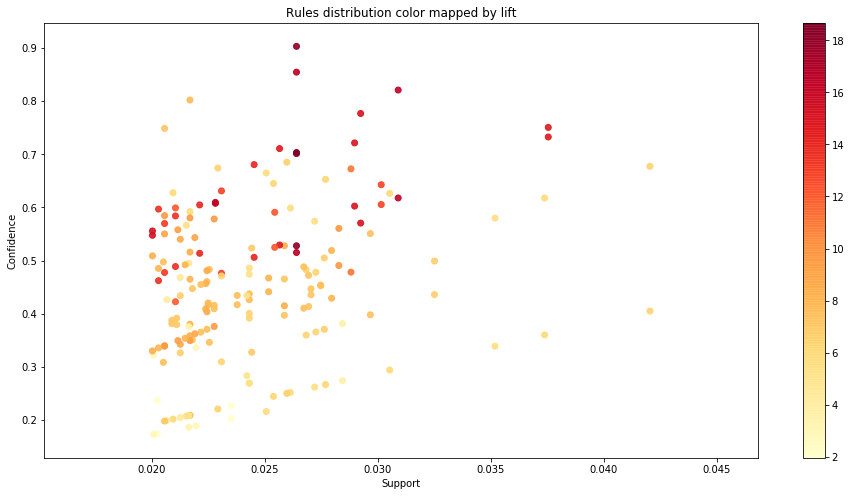

In [50]:
# Visualizing the rules distribution color mapped by Lift
# https://www.kaggle.com/ostrowski/market-basket-analysis-exploring-e-commerce-data
plt.figure(figsize=(16, 8))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], alpha=0.9, cmap='YlOrRd');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

In [51]:
del rules['antecedent support']
del rules['consequent support']
del rules['leverage']
del rules['conviction']

## Top 10 rules with maximum support

In [58]:
rules.head(10)

,antecedents,consequents,support,confidence,lift
42,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.042053,0.405057,6.523895
43,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.042053,0.677308,6.523895
111,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037553,0.732497,14.639752
110,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037553,0.750535,14.639752
127,(JUMBO STORAGE BAG SUKI),(JUMBO BAG RED RETROSPOT),0.037392,0.617699,5.949737
126,(JUMBO BAG RED RETROSPOT),(JUMBO STORAGE BAG SUKI),0.037392,0.360165,5.949737
129,(JUMBO BAG RED RETROSPOT),(JUMBO SHOPPER VINTAGE RED PAISLEY),0.035196,0.339009,5.585425
128,(JUMBO SHOPPER VINTAGE RED PAISLEY),(JUMBO BAG RED RETROSPOT),0.035196,0.579876,5.585425
167,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.032517,0.499178,6.694072
166,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.032517,0.436063,6.694072


## Top 10 rules with maximum confidence

In [59]:
rules_1 = association_rules(frequent_sets, metric="confidence",min_threshold=0.5)
rules_1 = rules_1.sort_values(by='confidence',ascending=False)[0:10]

del rules_1['antecedent support']
del rules_1['consequent support']
del rules_1['leverage']
del rules_1['conviction']

rules_1.head(10)

,antecedents,consequents,support,confidence,lift
2,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.026410,0.902930,18.046041
0,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.026410,0.854419,16.666089
13,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030910,0.820768,16.403939
10,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)",(JUMBO BAG RED RETROSPOT),0.021696,0.801980,7.724749
30,(PINK REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.029249,0.776671,15.149556
42,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.037553,0.750535,14.639752
28,"(JUMBO SHOPPER VINTAGE RED PAISLEY, JUMBO STOR...",(JUMBO BAG RED RETROSPOT),0.020571,0.748538,7.209989
43,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037553,0.732497,14.639752
32,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.028982,0.721333,14.994576
55,(CHARLOTTE BAG PINK POLKADOT),(RED RETROSPOT CHARLOTTE BAG),0.025660,0.710682,14.658906


## Top 10 rules with maximum lift

In [60]:
rules_2 = association_rules(frequent_sets, metric="lift",min_threshold=1)
rules_2 = rules_2.sort_values(by='lift',ascending=False)[0:10]
del rules_2['antecedent support']
del rules_2['consequent support']
del rules_2['leverage']
del rules_2['conviction']
rules_2.head(10)

,antecedents,consequents,support,confidence,lift
1,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.026410,0.703281,18.674462
4,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.026410,0.701280,18.674462
2,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.026410,0.902930,18.046041
3,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.026410,0.527837,18.046041
0,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",(ROSES REGENCY TEACUP AND SAUCER),0.026410,0.854419,16.666089
5,(ROSES REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...",0.026410,0.515152,16.666089
23,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030910,0.820768,16.403939
22,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.030910,0.617773,16.403939
62,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.022821,0.607703,16.228894
63,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.022821,0.609442,16.228894
